<a href="https://colab.research.google.com/github/madhusudanrudresh/MNIST-Image-classification/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset

I will be working on the MNIST dataset here. The dataset consists of hand-written digits and we are going to develop Convolutional Neural Network to classify the images into its categories. I will be using Keras API since its very intuitive.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


## Loading the dataset

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of x_test: {}'.format(x_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


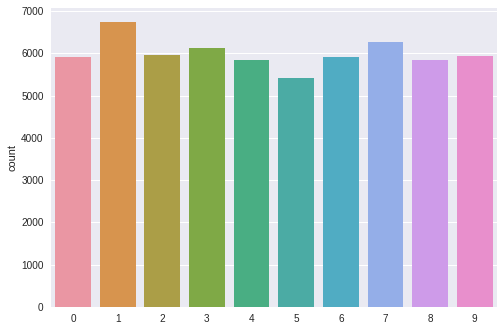

In [4]:
sns.set()
sns.countplot(y_train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


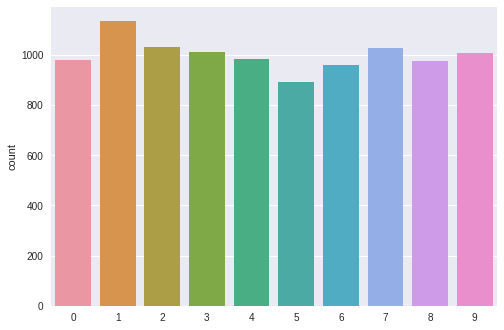

In [5]:
sns.countplot(y_test)

We can see that the distribution of numbers in both the training and test dataset are balanced. 

## Data preparation

### 1. Normalising the dataset

In [0]:
x_trainnorm = x_train/255
x_testnorm = x_test/255

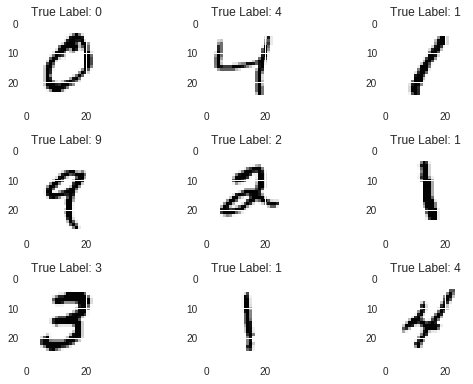

In [7]:
count = 1
fig, ax = plt.subplots(3,3)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(x_trainnorm[count])
    ax[i,j].set_title('True Label: {}'.format(y_train[count]))
    count += 1

plt.tight_layout()

### 2. Reshape the dataset

It is better to prededine the shape of the dataset. Since all the MNIST images are gray scaled, so it only uses one channel. Therefore, we can reshape the images into (28,28,1) matrices

In [0]:
x_train = x_trainnorm.reshape(x_train.shape[0],28,28,1)
x_test = x_testnorm.reshape(x_test.shape[0],28,28,1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

### 3. Spliting the training dataset

I will split the training set into training(80%) and validation set(20%) 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### 4. Label Encoding

Converting labels into one hot encoding

In [0]:
num_classes = 10   # 0-9 digits

y_train = to_categorical(y_train,num_classes)
y_val = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)

## CNN Model

I will be building a Sequential CNN Model for the image classification. 

1. The first two layers are Convolutional layers with 32 filters of kernel size 3x3. The Relu activation function is used
2. Max Pooling layer of 2x2 filter is used which basically downsamples the images and ultimately reduces the computional cost
3. Dropout of 0.25 is used which means only 75% of the nodes will be active at any point of time. This regularization techniques reduces overfitting.

In [13]:
x_train.shape

(48000, 28, 28, 1)

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())                     ## Flattening out of the network to one dimensional vec
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

### 2. Optimizer

I will be using Adam optimizer as it combines the best properties of Adagrad and RMSprop algorithms to provide optimization algorithm.

In [0]:
adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

### 3. Fit the Model

We will be fitting the model using x_train and y_train while taking validation set as x_val and y_val. Batch size of 32 and 30 epochs are chosen respectively.

In [17]:
model.fit(x=x_train,             ## We will be fitting the training data and labels into the model
          y=y_train,
          validation_data=(x_val,y_val),
          batch_size=32,
          epochs=30,
          verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 15s 305us/step - loss: 0.4810 - acc: 0.8451 - val_loss: 0.1068 - val_acc: 0.9697
Epoch 2/30
48000/48000 [==============================] - 9s 183us/step - loss: 0.1483 - acc: 0.9550 - val_loss: 0.0715 - val_acc: 0.9796
Epoch 3/30
48000/48000 [==============================] - 9s 184us/step - loss: 0.1043 - acc: 0.9676 - val_loss: 0.0563 - val_acc: 0.9841
Epoch 4/30
48000/48000 [==============================] - 9s 183us/step - loss: 0.0841 - acc: 0.9747 - val_loss: 0.0475 - val_acc: 0.9867
Epoch 5/30
48000/48000 [==============================] - 9s 184us/step - loss: 0.0728 - acc: 0.9776 - val_loss: 0.0394 - val_acc: 0.9891
Epoch 6/30
48000/48000 [==============================] - 10s 198us/step - loss: 0.0622 - acc: 0.9811 - val_loss: 0.0352 - val_acc: 0.9898
Epoch 7/30
48000/48000 [==============================] - 9s 186us/step 

### 4. Evaluate the model

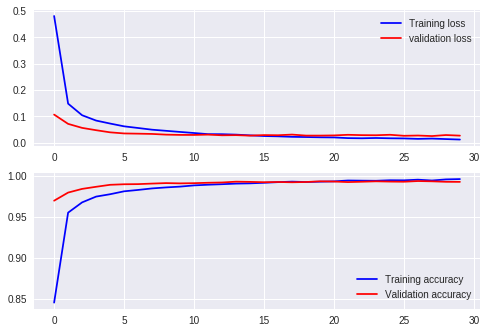

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(model.history.history['loss'], color='b', label="Training loss")
ax[0].plot(model.history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model.history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(model.history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

From the above graph, we can see that the training and validation accuracy are close to each other. Thus, there is no overfitting here.

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1) 

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
print('The Confusion matrix is:\n', confusion_matrix(y_true,y_pred_classes))
print('The Accuracy score is:\n', accuracy_score(y_true,y_pred_classes))

The Confusion matrix is:
 [[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   1    0 1029    0    0    0    1    1    0    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    0    0  967    0    6    1    0    8]
 [   1    0    0    6    0  884    1    0    0    0]
 [   2    1    0    1    1    5  948    0    0    0]
 [   0    1    5    0    0    0    0 1020    0    2]
 [   1    0    2    2    0    1    0    0  967    1]
 [   0    0    1    0    2    5    1    3    0  997]]
The Accuracy score is:
 0.9928
